In [1]:
import sys, os

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import default_paths
from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm

from plotting import load_fits, plot_utils

In [2]:
# Load everything

models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)

which_prf_grid=5;
feature_type='gabor_solo'
# subject=999
subject=998

path_to_load = default_paths.gabor_texture_feat_path
path_to_load = os.path.join(path_to_load, 'feature_stats')

fn1 = os.path.join(path_to_load, 'S%d_%s_mean_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_var_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_covar_grid%d.npy'%(subject, feature_type, which_prf_grid))

mean = np.load(fn1,allow_pickle=True)
var = np.load(fn2,allow_pickle=True)
covar = np.load(fn3,allow_pickle=True)

In [3]:
fn1 = os.path.join(path_to_load, 'S%d_%s_semantic_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_semantic_discrim_tstat_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_nsamp_grid%d.npy'%(subject, feature_type, which_prf_grid))

corr = np.load(fn1,allow_pickle=True) * (-1)
discrim = np.load(fn2,allow_pickle=True) * (-1)
nsamp = np.load(fn3,allow_pickle=True)

fn1 = os.path.join(path_to_load, 'S%d_%s_semantic_partial_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_nsamp_partial_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))

partial_corr = np.load(fn1,allow_pickle=True) * (-1)
partial_nsamp = np.load(fn2,allow_pickle=True)

In [4]:
fn2load = os.path.join(default_paths.stim_labels_root, 'Highlevel_counts_all.npy')
counts = np.load(fn2load, allow_pickle=True).item()
axis_names = counts['axis_names']
axes_use = [1,2,3,4,5]
axis_names = np.array(axis_names)[axes_use]
signed_names = [dd.replace('-', '>') for dd in axis_names]
axis_names, signed_names

(array(['face-none', 'building-none', 'animate-inanimate', 'small-large',
        'indoor-outdoor'], dtype='<U17'),
 ['face>none',
  'building>none',
  'animate>inanimate',
  'small>large',
  'indoor>outdoor'])

In [5]:
# Gather information about the gabor feature channels
sf_unique, ori_unique = analyze_gabor_params.get_gabor_feature_info(n_ori=12, n_sf=8)
n_sf = len(sf_unique)
n_ori = len(ori_unique)

mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
 

In [7]:
partial_corr.shape

(96, 1456, 5)

In [6]:
partial_corr_reshaped = np.reshape(partial_corr, [n_ori, n_sf, n_prfs, len(signed_names)], order='F')
corr_reshaped = np.reshape(corr, [n_ori, n_sf, n_prfs, len(signed_names)], order='F')

[-0.013114769, 0.07821554]
[0.016692603, 0.101103276]
[-0.1768591, 0.19714555]
[-0.05846038, 0.0666107]
[-0.20327403, 0.13053535]


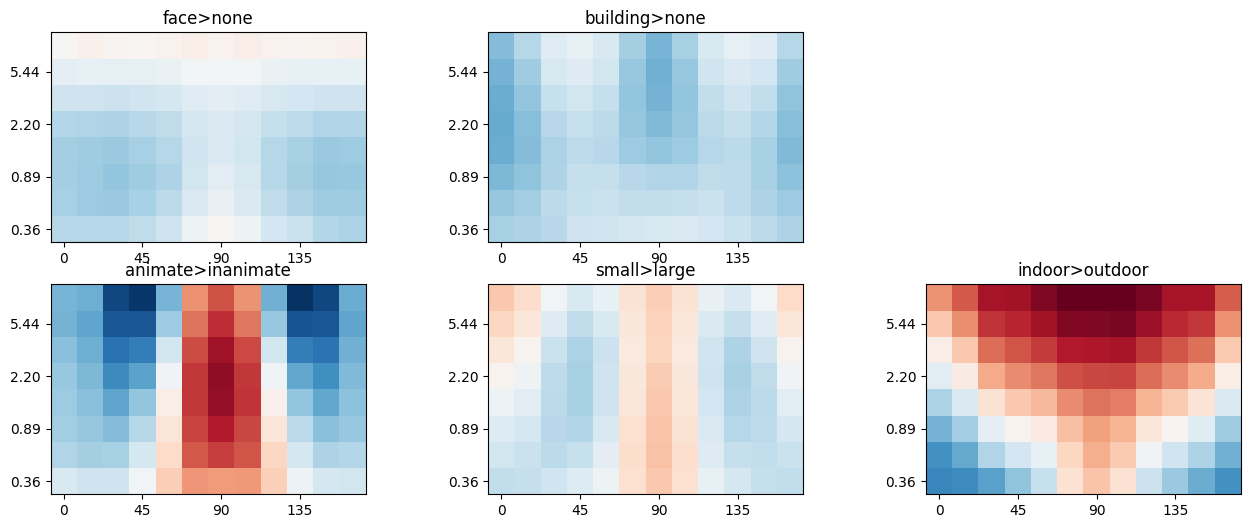

In [8]:
clims = [[-0.2, 0.2] for ai in range(5)];
# clims = [[-0.22, 0.22], [-0.21, 0.21], [-0.07, 0.07]]

plt.figure(figsize=(16,6));
    
pi = 0;
for ai, aa in enumerate(signed_names):
    
    pi+=1
    plt.subplot(2,3,pi)
    if pi==2:
        pi+=1
        
    # image = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
    image = np.nanmean(partial_corr_reshaped[:,:,:,ai], axis=2)
    print([np.min(image), np.max(image)])
    plt.pcolormesh(image.T, vmin=clims[ai][0], vmax=clims[ai][1], cmap=cm.RdBu)
    # plt.pcolormesh(image.T)
    # plt.colorbar()
    # if ai>2:
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    # plt.xlabel('orientation (deg)')
    # else:
        # plt.xticks(np.arange(0,12,3)+0.5,[])
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    # if ai==0:
    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    # plt.ylabel('spatial frequency (cyc/deg)')
    # else:
        # plt.yticks(np.array([0,2,4,6])+0.5, [])
        
   
    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    # plt.axis('off')
    
    
    plt.title(signed_names[ai])
    
    # plt.box(False)
    
fn2save = fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs_2dplots.pdf')
plt.savefig(fn2save)


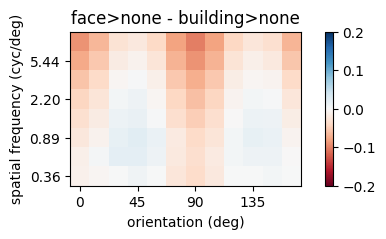

In [9]:
plt.figure(figsize=(4,2))

clims = [-0.2, 0.2]

aa1 = 0; aa2 = 1;
image = np.nanmean(partial_corr_reshaped[:,:,:,aa1], axis=2) - np.nanmean(partial_corr_reshaped[:,:,:,aa2], axis=2)
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.RdBu)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')

plt.title('%s - %s'%(signed_names[aa1], signed_names[aa2]))

# plt.box(False)

fn2save = fn2save = os.path.join(default_paths.fig_path,'face_minus_building_imagestats.pdf')
plt.savefig(fn2save)


#### Plot partial correlations, overlaying different semantic axes

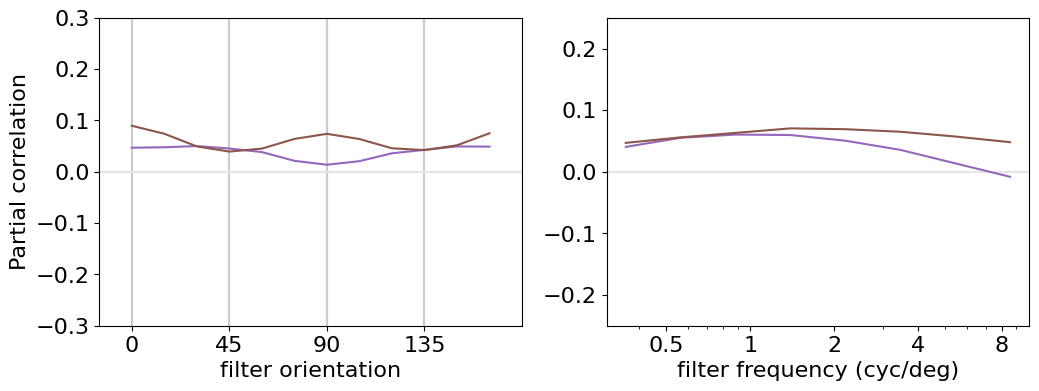

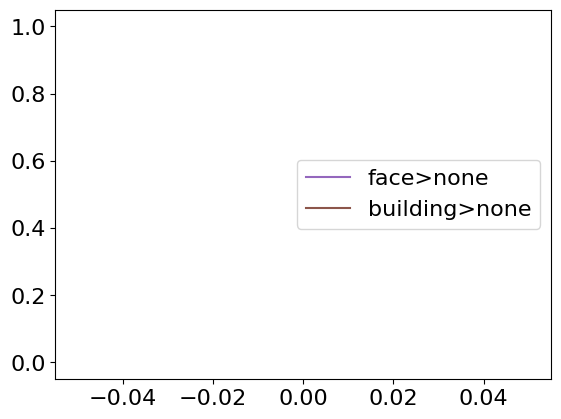

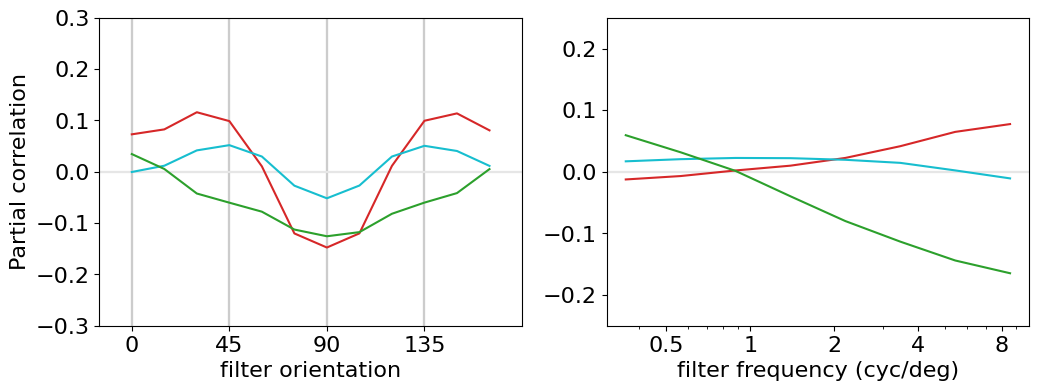

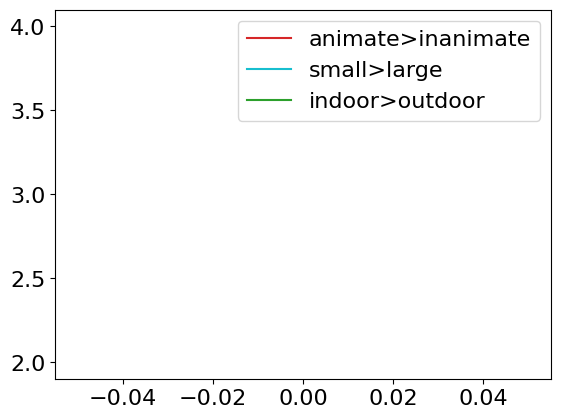

In [10]:
# colors = cm.tab10(np.linspace(0,1,10))[[3,9,2],:]
colors = cm.tab10(np.linspace(0,1,10))[[4,5,3,9,2],:]

plot_utils.set_all_font_sizes(16)

plt.rcParams['pdf.fonttype']=42

for axes_plot in [[0,1],[2,3,4]]:

    plt.figure(figsize=(12,4));

    for ai in axes_plot:
       
        plt.subplot(1,2,1)
        mean_each_orient = np.mean(partial_corr_reshaped[:,:,:,ai], axis=1);
        # meanvals = np.mean(mean_each_orient, axis=1)
        # stdvals = np.std(mean_each_orient, axis=1)
        meanvals = np.nanmean(mean_each_orient, axis=1)
        stdvals = np.nanstd(mean_each_orient, axis=1)

        plt.plot(ori_unique, meanvals, color=colors[ai,:], zorder=10)

        # plt.fill_between(ori_unique, meanvals-stdvals, meanvals+stdvals,
        #         alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)


        plt.xlabel('filter orientation');
        plt.xlim([-15, 180])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])
        plt.xticks(np.arange(0,180,45))
        plt.axhline(0, color=[0.9, 0.9, 0.9])
        plt.ylabel('Partial correlation')
        plt.ylim([-0.30, 0.30])

        ax = plt.subplot(1,2,2)
        mean_each_sf = np.mean(partial_corr_reshaped[:,:,:,ai], axis=0);
        # meanvals = np.mean(mean_each_sf, axis=1)
        # stdvals = np.std(mean_each_sf, axis=1)
        meanvals = np.nanmean(mean_each_sf, axis=1)
        stdvals = np.nanstd(mean_each_sf, axis=1)

        plt.plot(sf_unique, meanvals, color=colors[ai,:], zorder=10)

        # plt.fill_between(sf_unique, meanvals-stdvals, meanvals+stdvals,
                # alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

        plt.xlabel('filter frequency (cyc/deg)');
        plt.axhline(0, color=[0.9, 0.9, 0.9]);
        plt.ylim([-0.25, 0.25])
        plt.gca().set_xscale('log')
        plt.xticks([10**np.log10(0.5), 10**np.log10(1), \
                        10**np.log10(2),10**np.log10(4), \
                        10**np.log10(8)],\
                       [0.5,1,2,4,8])

    # plt.legend(lh, signed_names)

    # fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs.pdf')
    # plt.savefig(fn2save)

    plt.figure();
    for ai in axes_plot:
        plt.plot(0,ai, '-', color=colors[ai,:])

    plt.legend(np.array(signed_names)[axes_plot])

In [18]:
s = models[:,2].round(2)
e = np.sqrt(models[:,0]**2+models[:,1]**2).round(2)

sizes = np.unique(s)
eccens = np.unique(e)

size_ind_max = 4;
ecc_ind_center = 3;
ecc_ind_periph = 6;
center_inds = (s<=sizes[size_ind_max]) & (e<eccens[ecc_ind_center])
periph_inds = (s<=sizes[size_ind_max]) & (e>eccens[ecc_ind_periph])

prf_names = ['central','peripheral']

prf_groups = [center_inds, periph_inds]

# models[center_inds,:].round(2), models[periph_inds,:].round(2)

In [19]:
sizes[size_ind_max], eccens[ecc_ind_center], eccens[ecc_ind_periph]

(0.11, 0.11, 0.34)

In [20]:
partial_corr_reshaped.shape

(12, 8, 1456, 5)

[-0.021201689, 0.04979082]
[-0.012412096, 0.123488955]
[-0.26839274, 0.15506789]
[-0.07519969, 0.08591246]
[-0.16538486, 0.107036255]
[0.0002441385, 0.029081086]
[0.0065787463, 0.09524586]
[-0.13952202, 0.13357377]
[-0.03102169, 0.13006285]
[-0.2740092, 0.07277707]


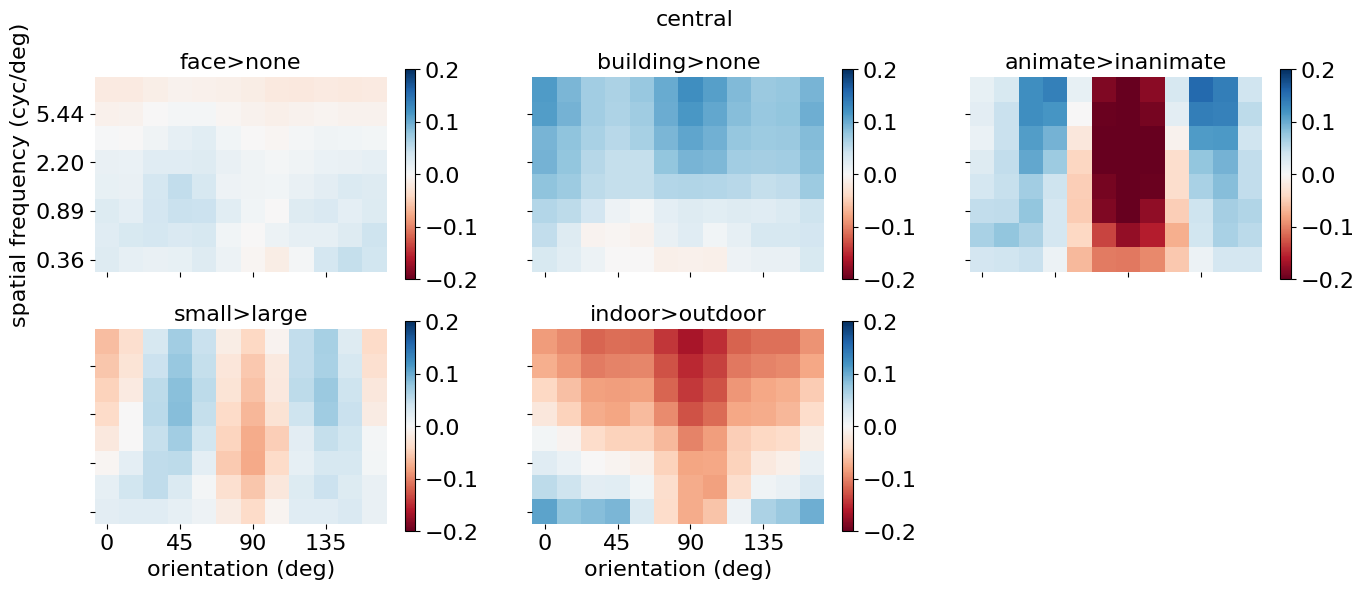

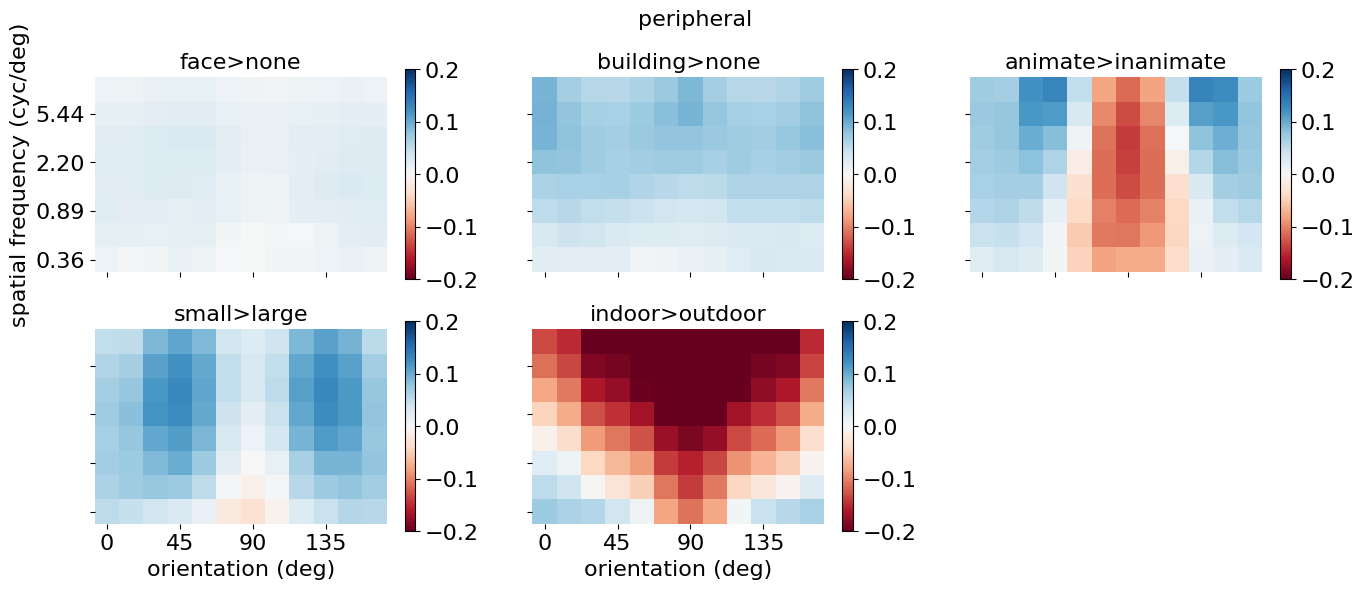

In [21]:
clims = [[-0.2, 0.2] for ai in range(5)];
# clims = [[-0.22, 0.22], [-0.21, 0.21], [-0.07, 0.07]]

for name, prf_inds in zip(prf_names, prf_groups):

    plt.figure(figsize=(16,6));

    for ai, aa in enumerate(signed_names):

        plt.subplot(2,3,ai+1)

        # image = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
        image = np.nanmean(partial_corr_reshaped[:,:,prf_inds,ai], axis=2)
        print([np.min(image), np.max(image)])
        plt.pcolormesh(image.T, vmin=clims[ai][0], vmax=clims[ai][1], cmap=cm.RdBu)
        # plt.pcolormesh(image.T)
        plt.colorbar()
        if ai>2:
            plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
            plt.xlabel('orientation (deg)')
        else:
            plt.xticks(np.arange(0,12,3)+0.5,[])
        sf_ticks = sf_unique[[0,2,4,6]].round(2)
        if ai==0:
            plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
            plt.ylabel('spatial frequency (cyc/deg)')
        else:
            plt.yticks(np.array([0,2,4,6])+0.5, [])


        plt.axis('square')
        plt.xlim([0,12])
        plt.ylim([0,8])
        # plt.axis('off')


        plt.title(signed_names[ai])

        plt.box(False)
        
    plt.suptitle(name)

# fn2save = fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs_2dplots.pdf')
# plt.savefig(fn2save)


#### Raw correlation coefs, not partial

[-0.065822646, 0.1867119]
[0.0067797364, 0.22069891]
[-0.13195007, 0.17227183]
[-0.23924632, 0.14656867]
[-0.28520635, 0.1528216]


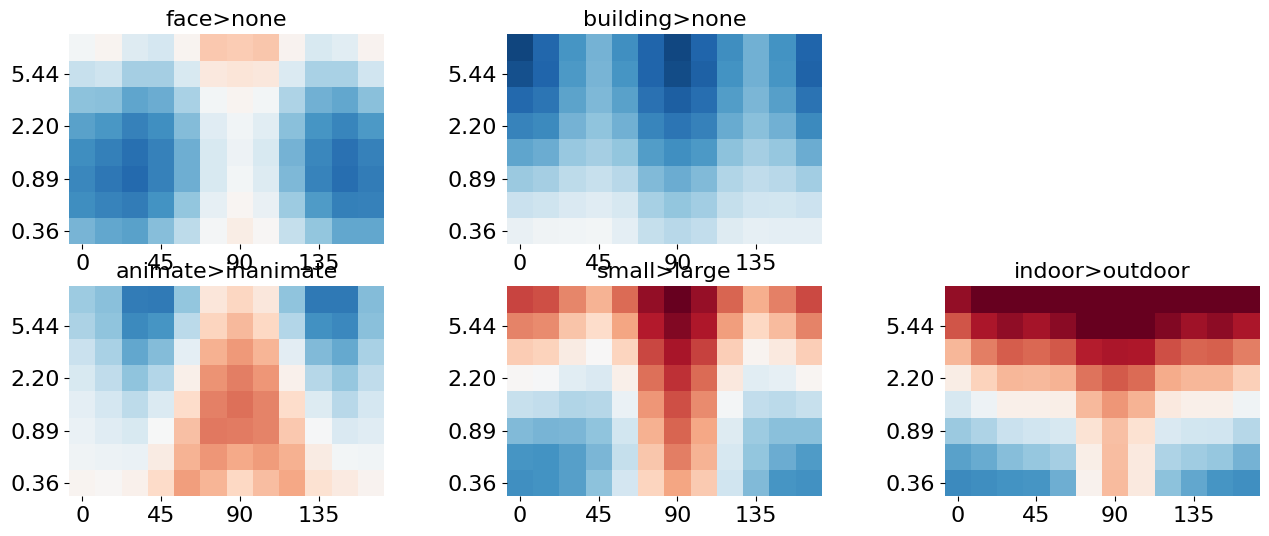

In [15]:
clims = [[-0.24, 0.24] for ai in range(5)];
# clims = [[-0.22, 0.22], [-0.21, 0.21], [-0.07, 0.07]]

plt.figure(figsize=(16,6));
    
pi = 0
for ai in range(len(signed_names)):
    
    pi+=1
    plt.subplot(2,3,pi)
    if pi==2:
        pi+=1;
    image = np.mean(corr_reshaped[:,:,:,ai], axis=2)
    print([np.min(image), np.max(image)])
    plt.pcolormesh(image.T, vmin=clims[ai][0], vmax=clims[ai][1], cmap=cm.RdBu)
    # plt.pcolormesh(image.T)
    # plt.colorbar()
    # if ai>2:
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    # plt.xlabel('Orient. (deg)')
    # else:
        # plt.xticks(np.arange(0,12,3)+0.5,[])
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    # if ai==0:
    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    # plt.ylabel('S.F. (cyc/deg)')
    # else:
        # plt.yticks(np.array([0,2,4,6])+0.5, [])
        
   
    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    # plt.axis('off')
    
    plt.title(signed_names[ai])
    
    plt.box(False)
    
# fn2save = fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs_2dplots.pdf')
# plt.savefig(fn2save)

In [27]:
fn = '/user_data/mmhender/nsd/labels/Semantic_to_semantic_corrs_grid5.npy'
out = np.load(fn, allow_pickle=True)
out.shape

(6, 6, 1456)

In [31]:
import pandas as pd
vals = np.mean(out, axis=2)
vals = vals[axes_use,:][:,axes_use]
n_axes = len(axis_names)
for ii in range(n_axes):
    vals[ii,ii] = 1
pd.DataFrame(vals, columns=axis_names, index=axis_names)

,face-none,building-none,animate-inanimate,small-large,indoor-outdoor
face-none,1.000000,-0.014912,0.313695,0.176816,0.026260
building-none,-0.014912,1.000000,-0.034406,-0.199721,-0.318167
animate-inanimate,0.313695,-0.034406,1.000000,-0.206488,-0.386124
small-large,0.176816,-0.199721,-0.206488,1.000000,0.364214
indoor-outdoor,0.026260,-0.318167,-0.386124,0.364214,1.000000


#### Plot mean/variance each feature channel
Averaged across pRFs

0.03920804 0.13662134
0.00013643742 0.0012682579


Text(0.5, 1.0, 'var')

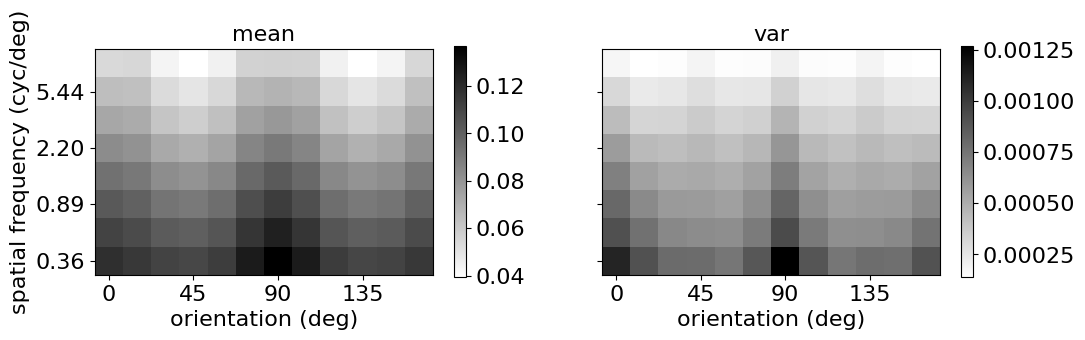

In [32]:
plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image = np.mean(mean_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image = np.mean(var_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')
    

0.042203274 0.13086486
0.00020776206 0.0014513802
0.036037467 0.14346278
0.00019840992 0.0019043761


Text(0.5, 0.98, 'peripheral - central')

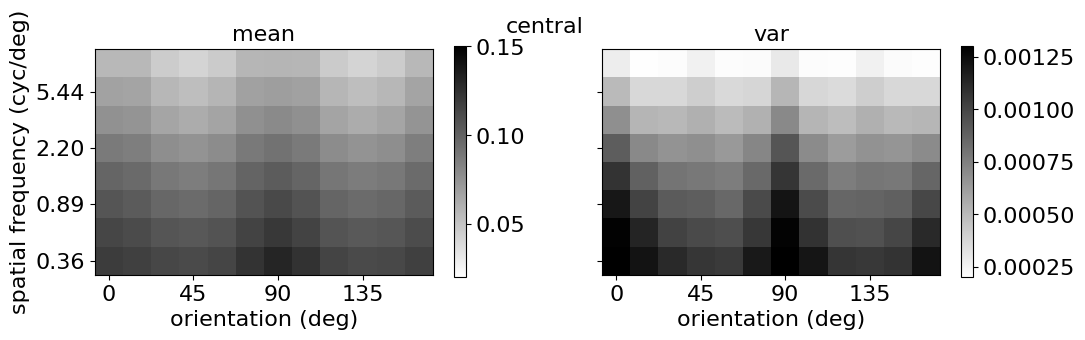

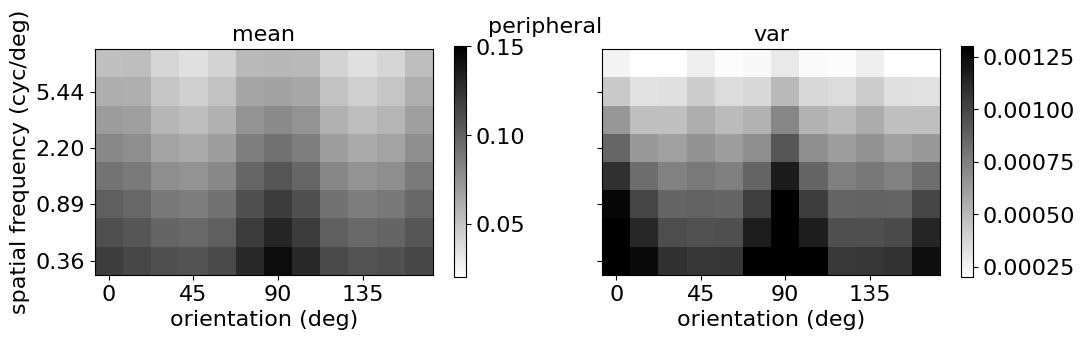

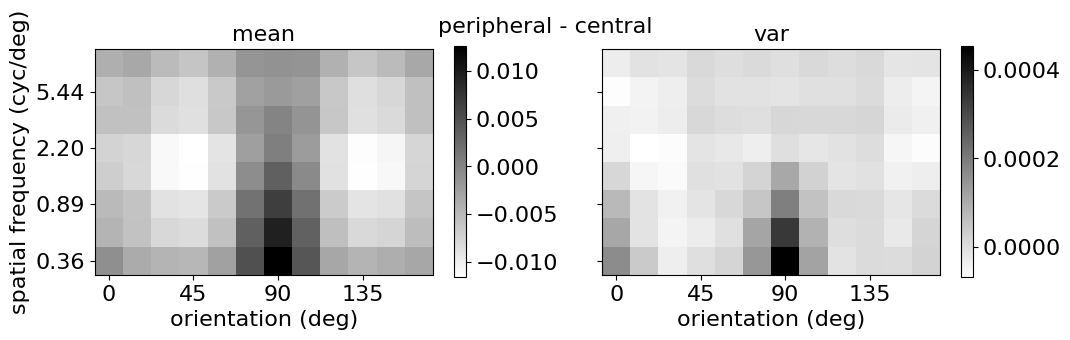

In [ ]:
clims_mean = [0.02, 0.15]
clims_var = [0.0002, 0.0013]

for name, prf_inds in zip(prf_names, prf_groups):

    plt.figure(figsize=(12,3));

    plt.subplot(1,2,1)

    image = np.mean(mean_reshaped[:,:,prf_inds], axis=2)
    print(np.min(image), np.max(image))
    # clims = [np.min(image), np.max(image)]
    plt.pcolormesh(image.T, vmin=clims_mean[0], vmax=clims_mean[1], cmap=cm.gray_r)
    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)

    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    plt.ylabel('spatial frequency (cyc/deg)')

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    plt.xlabel('orientation (deg)')
    plt.title('mean')

    plt.subplot(1,2,2)

    image = np.mean(var_reshaped[:,:,prf_inds], axis=2)
    print(np.min(image), np.max(image))
    # clims = [np.min(image), np.max(image)]
    plt.pcolormesh(image.T, vmin=clims_var[0], vmax=clims_var[1], cmap=cm.gray_r)

    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    plt.yticks(np.array([0,2,4,6])+0.5, [])

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])

    plt.xlabel('orientation (deg)')

    plt.title('var')
    
    plt.suptitle(name)

plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image1 = np.mean(mean_reshaped[:,:,prf_groups[1]], axis=2)
image2 = np.mean(mean_reshaped[:,:,prf_groups[0]], axis=2)
image = image1 - image2

# print(np.min(image), np.max(image))
# clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, \
               # vmin=clims_mean[0], vmax=clims_mean[1], \
               cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image1 = np.mean(var_reshaped[:,:,prf_groups[1]], axis=2)
image2 = np.mean(var_reshaped[:,:,prf_groups[0]], axis=2)
image = image1 - image2

# print(np.min(image), np.max(image))
# clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, \
               # vmin=clims_var[0], vmax=clims_var[1], \
               cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')

plt.suptitle('%s - %s'%(prf_names[1], prf_names[0]))